In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# --- Generate dummy dataset ---

np.random.seed(42)
n_samples = 5500

age = np.random.normal(35, 10, n_samples).clip(18, 70)
income = np.random.normal(60, 20, n_samples).clip(20, 150)
browsing_time = np.random.exponential(10, n_samples).clip(1, 60)
ads_clicked = np.random.poisson(2, n_samples).clip(0, 10)
previous_purchases = np.random.poisson(1.5, n_samples).clip(0, 20)

df = pd.DataFrame({
    "age": age,
    "income": income,
    "browsing_time": browsing_time,
    "ads_clicked": ads_clicked,
    "previous_purchases": previous_purchases
})

# Normalize features for target simulation
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df)

weights = np.array([-0.2, 0.4, 0.6, 0.3, 0.5])
bias = -0.3
logits = np.dot(X_scaled, weights) + bias
probs = 1 / (1 + np.exp(-logits))

y = (probs > 0.5).astype(int)
df['purchase'] = y

# Save dataset to CSV
csv_filename = "dummy_dataset.csv"
df.to_csv(csv_filename, index=False)
print(f"Dataset saved as '{csv_filename}'")

# --- Prepare features and target ---
X = X_scaled
y = df['purchase'].values

# --- 2-way split (train/test) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n=== 2-Way Split ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# --- 3-way split (train/val/test) ---
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)

print("\n=== 3-Way Split ===")
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(classification_report(y_val, y_val_pred))

y_test_pred = model.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

# --- K-Fold Cross Validation (5 folds) ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print("\n=== 5-Fold Cross Validation ===")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Std Dev Accuracy: {cv_scores.std():.4f}")


Dataset saved as 'dummy_dataset.csv'

=== 2-Way Split ===
Accuracy: 0.9918
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       551
           1       1.00      0.99      0.99       549

    accuracy                           0.99      1100
   macro avg       0.99      0.99      0.99      1100
weighted avg       0.99      0.99      0.99      1100


=== 3-Way Split ===
Validation Accuracy: 0.9864
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       520
           1       1.00      0.98      0.99       580

    accuracy                           0.99      1100
   macro avg       0.99      0.99      0.99      1100
weighted avg       0.99      0.99      0.99      1100

Test Accuracy: 0.9864

=== 5-Fold Cross Validation ===
Mean Accuracy: 0.9896
Std Dev Accuracy: 0.0012


In [7]:
print("=== Dataset Head ===")
print(df.head())

=== Dataset Head ===
         age     income  browsing_time  ads_clicked  previous_purchases  \
0  39.967142  74.062851       1.000000            2                   2   
1  33.617357  70.664146      39.282577            2                   0   
2  41.476885  63.308073       9.578729            4                   0   
3  50.230299  32.359649       2.026846            1                   1   
4  32.658466  50.327657      11.365294            3                   0   

   purchase  
0         0  
1         1  
2         0  
3         0  
4         0  


In [8]:
print("\n=== Dataset Tail ===")
print(df.tail())


=== Dataset Tail ===
            age     income  browsing_time  ads_clicked  previous_purchases  \
5495  22.243173  64.828182       5.856522            0                   0   
5496  33.714537  66.505034       4.604966            1                   1   
5497  28.483249  83.585263      11.080529            0                   3   
5498  18.000000  75.822800      27.859541            3                   1   
5499  50.994709  54.304089       1.000000            1                   2   

      purchase  
5495         0  
5496         0  
5497         1  
5498         1  
5499         0  


In [9]:
print("\n=== Dataset Describe ===")
print(df.describe())


=== Dataset Describe ===
               age       income  browsing_time  ads_clicked  \
count  5500.000000  5500.000000    5500.000000  5500.000000   
mean     35.201041    59.921980      10.285240     1.996545   
std       9.550798    19.692585      10.021249     1.411442   
min      18.000000    20.000000       1.000000     0.000000   
25%      28.420950    46.224025       3.008150     1.000000   
50%      35.057584    59.639378       7.190425     2.000000   
75%      41.595009    73.446348      14.169538     3.000000   
max      70.000000   130.581104      60.000000     9.000000   

       previous_purchases     purchase  
count         5500.000000  5500.000000  
mean             1.483091     0.510727  
std              1.219159     0.499930  
min              0.000000     0.000000  
25%              1.000000     0.000000  
50%              1.000000     1.000000  
75%              2.000000     1.000000  
max              9.000000     1.000000  


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = X_scaled
y = df['purchase'].values

# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("2-Way Split Shapes:")
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

print("\nTarget distribution in train:")
print(pd.Series(y_train).value_counts(normalize=True))
print("Target distribution in test:")
print(pd.Series(y_test).value_counts(normalize=True))

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)
print("\n2-Way Split Classification Report:")
print(classification_report(y_test, y_pred))


2-Way Split Shapes:
Train: (4400, 6), (4400,)
Test: (1100, 6), (1100,)

Target distribution in train:
1    0.513636
0    0.486364
Name: proportion, dtype: float64
Target distribution in test:
0    0.500909
1    0.499091
Name: proportion, dtype: float64

2-Way Split Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       551
           1       1.00      1.00      1.00       549

    accuracy                           1.00      1100
   macro avg       1.00      1.00      1.00      1100
weighted avg       1.00      1.00      1.00      1100



In [12]:
# Split 80% train+val, 20% test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split train+val into 75% train, 25% val -> overall 60% train, 20% val, 20% test
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

print("3-Way Split Shapes:")
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Validation: {X_val.shape}, {y_val.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

print("\nTarget distribution in train:")
print(pd.Series(y_train).value_counts(normalize=True))
print("Target distribution in val:")
print(pd.Series(y_val).value_counts(normalize=True))
print("Target distribution in test:")
print(pd.Series(y_test).value_counts(normalize=True))

# Train on train set
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Validate
y_val_pred = model.predict(X_val)
print("\n3-Way Split Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Test
y_test_pred = model.predict(X_test)
print(f"3-Way Split Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")


3-Way Split Shapes:
Train: (3300, 6), (3300,)
Validation: (1100, 6), (1100,)
Test: (1100, 6), (1100,)

Target distribution in train:
1    0.509091
0    0.490909
Name: proportion, dtype: float64
Target distribution in val:
1    0.527273
0    0.472727
Name: proportion, dtype: float64
Target distribution in test:
0    0.500909
1    0.499091
Name: proportion, dtype: float64

3-Way Split Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       520
           1       1.00      1.00      1.00       580

    accuracy                           1.00      1100
   macro avg       1.00      1.00      1.00      1100
weighted avg       1.00      1.00      1.00      1100

3-Way Split Test Accuracy: 1.0000


In [13]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=1000)

# Cross-validation accuracy scores
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print("5-Fold Cross Validation Accuracy Scores:")
print(cv_scores)
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Std Dev Accuracy: {cv_scores.std():.4f}")

print("\nTarget distribution in each fold test set:")
for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X)):
    y_fold_test = y[test_idx]
    dist = pd.Series(y_fold_test).value_counts(normalize=True)
    print(f"Fold {fold_idx + 1}:")
    print(dist)


5-Fold Cross Validation Accuracy Scores:
[1. 1. 1. 1. 1.]
Mean Accuracy: 1.0000
Std Dev Accuracy: 0.0000

Target distribution in each fold test set:
Fold 1:
0    0.500909
1    0.499091
Name: proportion, dtype: float64
Fold 2:
1    0.502727
0    0.497273
Name: proportion, dtype: float64
Fold 3:
1    0.524545
0    0.475455
Name: proportion, dtype: float64
Fold 4:
1    0.502727
0    0.497273
Name: proportion, dtype: float64
Fold 5:
1    0.524545
0    0.475455
Name: proportion, dtype: float64


2-Way Split Accuracy: 0.9918
3-Way Split Validation Accuracy: 0.9864
3-Way Split Test Accuracy: 0.9864
5-Fold CV Accuracy: 0.9896


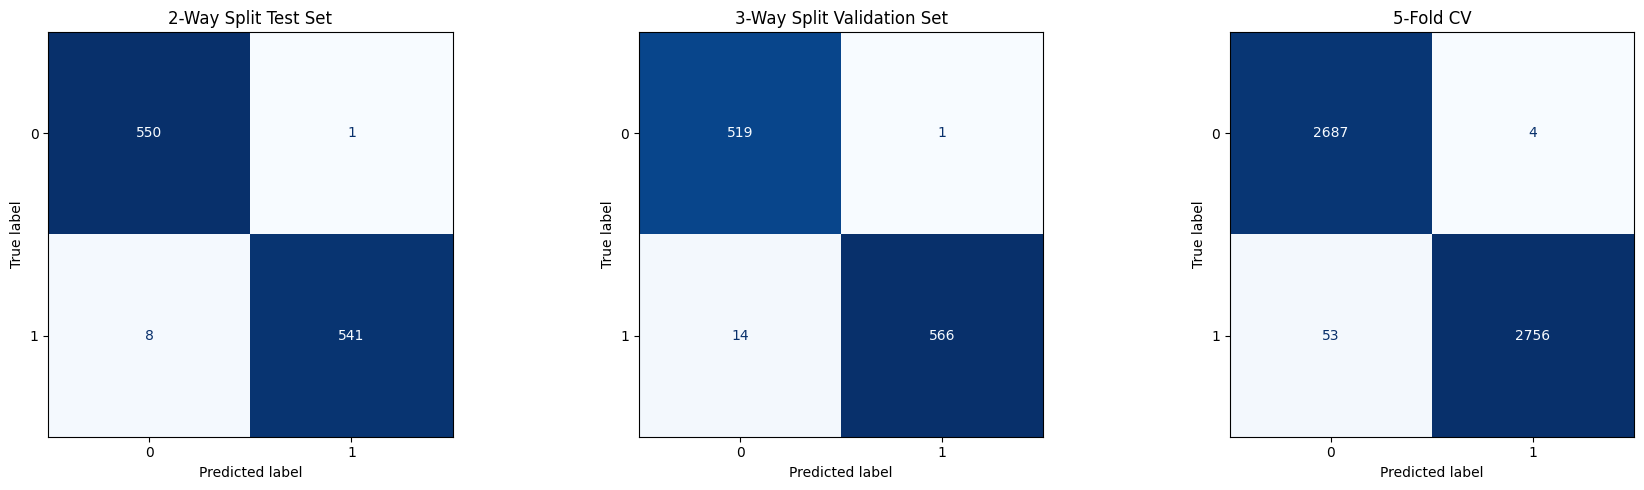

In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# --- Generate dataset ---
np.random.seed(42)
n_samples = 5500
age = np.random.normal(35, 10, n_samples).clip(18, 70)
income = np.random.normal(60, 20, n_samples).clip(20, 150)
browsing_time = np.random.exponential(10, n_samples).clip(1, 60)
ads_clicked = np.random.poisson(2, n_samples).clip(0, 10)
previous_purchases = np.random.poisson(1.5, n_samples).clip(0, 20)

df = pd.DataFrame({
    "age": age,
    "income": income,
    "browsing_time": browsing_time,
    "ads_clicked": ads_clicked,
    "previous_purchases": previous_purchases
})

# Scale features
feature_cols = ["age", "income", "browsing_time", "ads_clicked", "previous_purchases"]
X = df[feature_cols].values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Simulate target
weights = np.array([-0.2, 0.4, 0.6, 0.3, 0.5])
bias = -0.3
logits = np.dot(X, weights) + bias
probs = 1 / (1 + np.exp(-logits))
y = (probs > 0.5).astype(int)

# -------- 2-Way Split --------
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)
model_2 = LogisticRegression(max_iter=1000)
model_2.fit(X_train_2, y_train_2)
y_pred_2 = model_2.predict(X_test_2)
acc_2 = accuracy_score(y_test_2, y_pred_2)
cm_2 = confusion_matrix(y_test_2, y_pred_2)

# -------- 3-Way Split --------
X_trainval, X_test_3, y_trainval, y_test_3 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_3, X_val_3, y_train_3, y_val_3 = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)
model_3 = LogisticRegression(max_iter=1000)
model_3.fit(X_train_3, y_train_3)

# Validation predictions
y_val_pred_3 = model_3.predict(X_val_3)
acc_val_3 = accuracy_score(y_val_3, y_val_pred_3)
cm_val_3 = confusion_matrix(y_val_3, y_val_pred_3)

# Test predictions
y_test_pred_3 = model_3.predict(X_test_3)
acc_test_3 = accuracy_score(y_test_3, y_test_pred_3)
cm_test_3 = confusion_matrix(y_test_3, y_test_pred_3)

# -------- 5-Fold Cross Validation --------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model_kf = LogisticRegression(max_iter=1000)

y_true_kf = []
y_pred_kf = []

for train_index, test_index in kf.split(X):
    X_train_kf, X_test_kf = X[train_index], X[test_index]
    y_train_kf, y_test_kf = y[train_index], y[test_index]
    model_kf.fit(X_train_kf, y_train_kf)
    preds = model_kf.predict(X_test_kf)
    y_true_kf.extend(y_test_kf)
    y_pred_kf.extend(preds)

acc_kf = accuracy_score(y_true_kf, y_pred_kf)
cm_kf = confusion_matrix(y_true_kf, y_pred_kf)

# -------- Print accuracies --------
print(f"2-Way Split Accuracy: {acc_2:.4f}")
print(f"3-Way Split Validation Accuracy: {acc_val_3:.4f}")
print(f"3-Way Split Test Accuracy: {acc_test_3:.4f}")
print(f"5-Fold CV Accuracy: {acc_kf:.4f}")

# -------- Plot confusion matrices --------
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

titles = ['2-Way Split Test Set', '3-Way Split Validation Set', '5-Fold CV']
cms = [cm_2, cm_val_3, cm_kf]

for ax, cmatrix, title in zip(axs, cms, titles):
    disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix)
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(title)

plt.tight_layout()
plt.show()
